# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [24]:
# Carregando pacotes

import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [25]:
# Carregando a base

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
73,25.28,5.00,Female,Yes,Sat,Dinner,2,0.246548,20.28
160,21.50,3.50,Male,No,Sun,Dinner,4,0.194444,18.00
114,25.71,4.00,Female,No,Sun,Dinner,3,0.184247,21.71
78,22.76,3.00,Male,No,Thur,Lunch,2,0.151822,19.76
25,17.81,2.34,Male,No,Sat,Dinner,4,0.151261,15.47


In [26]:
# Reproduzindo o modelo do exercício anterior

reg2 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.52e-06
Time:                        07:27:49   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [27]:
# Ajustando em função logarítmica

y = tips['tip_pct']
x = tips['net_bill']

reg2 = smf.ols('y ~ np.log(x+.1)', data = tips).fit()
print(reg2.summary())
tips['res'] = reg2.resid

tips

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     60.24
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           2.35e-13
Time:                        07:27:49   Log-Likelihood:                 123.44
No. Observations:                 244   AIC:                            -242.9
Df Residuals:                     242   BIC:                            -235.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6204      0.055     11.

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,res
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,-0.129908
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,-0.094947
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.020755
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.006512
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.020604
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,0.119509
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,-0.044088
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,-0.056985
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,-0.083355


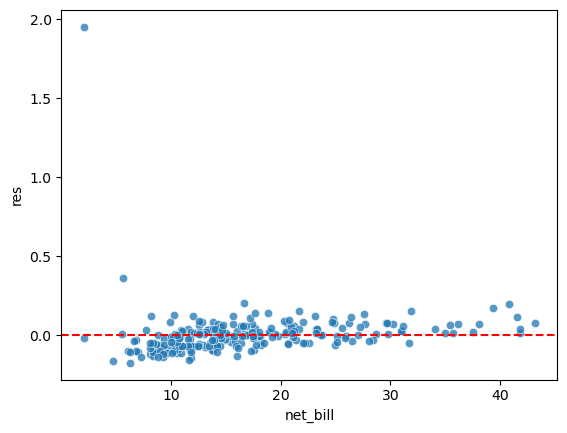

In [28]:
sns.scatterplot(x = x, y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.06e-09
Time:                        07:27:49   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4851      0.047     10.

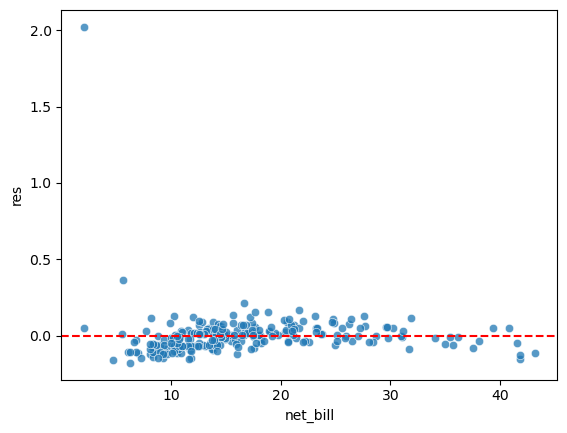

In [29]:
# Ajustando em função de um polinômio de segundo grau

reg3 = smf.ols('y ~ x + np.power(x,2)', data = tips).fit()
print(reg3.summary())
tips['res'] = reg3.resid

sns.scatterplot(x = x, y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:              np.log(y)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           8.27e-16
Time:                        07:27:49   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

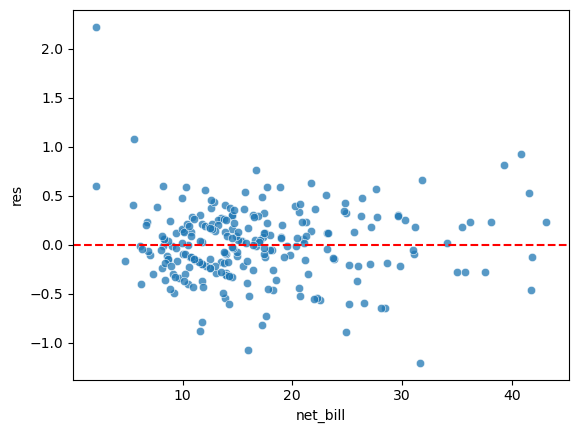

In [30]:
reg4 = smf.ols('np.log(y) ~ x', data = tips).fit()
print(reg4.summary())
tips['res'] = reg4.resid

sns.scatterplot(x = x, y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [31]:
tips['pred_pct'] = np.exp(reg4.fittedvalues)

tips[['pred_pct', 'tip_pct']].corr().iloc[0,1]**2

0.11440988592529763

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:              np.log(y)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           5.20e-20
Time:                        07:27:50   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3942      0.133     -2.961      0.0

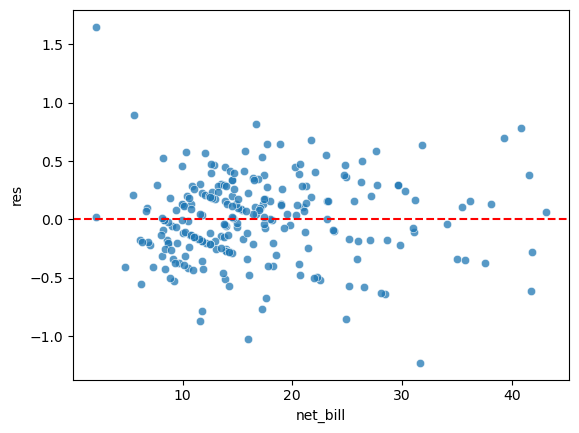

In [32]:
reg5 = smf.ols('np.log(y) ~ np.log(x)', data = tips).fit()
print(reg5.summary())
tips['res'] = reg5.resid

sns.scatterplot(x = x, y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [33]:
tips['pred2_pct'] = np.exp(reg5.fittedvalues)

tips[['pred2_pct', 'tip_pct']].corr().iloc[0,1]**2

0.30894874740322276

###  6. qual modelo resultou no melhor ajuste?

O modelo com log da porcentagem da gorjeta (tip_pct) com log do valor da conta (net_bill) resultou no melhor ajuste - maior valor de R² (coeficiente de determinação), e a distribuição dos erros ficou mais homogênea.